# Homework: Clustering
In this homework you will explore clustering using two different algorithms: K-Means and Gaussian Mixture Models. You will learn the use of these two models on synthetic data. The synthetic data was chosen to exhibit a reasonable clustering in 2D, and leads to easy visualization.  

In [42]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import mixture, datasets

np.random.seed(0)

## Code to make blobs dataset
X, y = datasets.make_blobs(n_samples=1500, random_state=6, cluster_std=[1.0, 2.5, 0.5])

## Save dataset
df = pd.DataFrame(X)
df.to_json('blobs.json')

## Problem 1 : K-Means Clustering 
We will begin by exploring K-Means clustering in a two-dimensional synthetic dataset.  The following sub-problems will walk you through model fitting, assessment, and analysis.  We begin in the cell below by loading and visualizing the data.

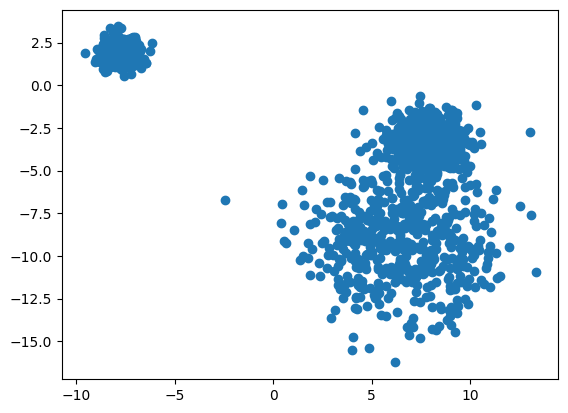

In [43]:
X = pd.read_json('blobs.json')
plt.scatter(X[0], X[1])
plt.show()

### Choosing K
Like most clustering models, fitting K-Means requires that we first specify the number of clusters K.  One of the easiest ways to do this is by using the "elbow" method.  The elbow method is not precise, but it is easy to do. In the cell below you will:
* Fit a K-Means model for values of K ranging from 1-to-5
* Plot the sum of squared errors for each model versus the value K (values are stored in the intertia_ attribute)
* Identify what you consider to be the "elbow"--the bend where adding more clusters does not improve as much
* Label axes and title the plot

[Documentation - Scikit-Learn - KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

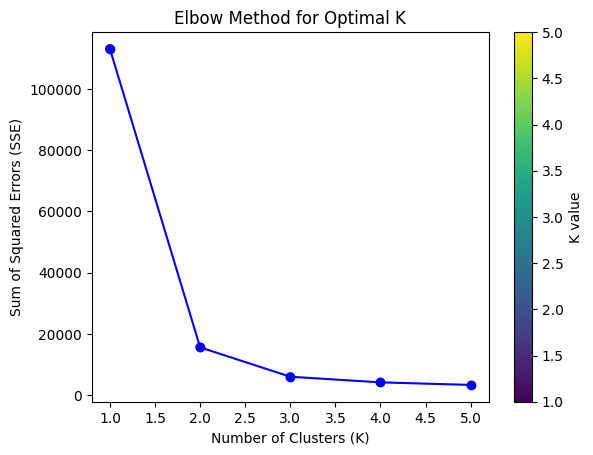

In [44]:
# Insert code here

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a range of K values
k_values = range(1, 6)
sse = []  # Sum of Squared Errors

# Fit K-Means models for different K values and calculate SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)  # Replace 'data' with your dataset
    sse.append(kmeans.inertia_)

# Plot SSE for each K value with colored markers
plt.plot(k_values, sse, marker='o', color='b')
plt.scatter(k_values, sse, c=k_values, cmap='viridis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.colorbar(label='K value')
plt.show()

### Initialization
The true data were generated using 3 clusters, so **we will use K=3 going forward**. K-Means clustering can be very sensitive to initialization of the cluster centers.  By default, the Scikit-Learn KMeans() performs random restarts and K-Means++ initialization.  However, to get a better insight into the algorithm, let's visualize the different solutions from each random initialization.  In the cell below you will fit the K-Means model from 10 different random initializations, and visualize the results of each in a scatterplot.  Do the following:
* Fit each model with n_clusters=3, init='random', n_init=1 (this last option turns off random restarts)
* For each run, show the results in a scatterplot
* In each scatterplot, color the data based on their associated clusters (e.g. red, green, blue or your colors of choice)

Note: Cluster assignments are stored in the labels_ attribute (see KMeans documentation)

Tip: You will produce several similar scatterplots in following sub-problems, so you may wish to write a function to do this.

In [45]:
data = X 
data

,0,1
0,7.918227,-3.381393
1,-7.911513,1.642909
2,8.891254,-11.327502
3,7.477215,-3.769888
4,-8.076607,2.046299
...,...,...
1495,10.004609,-9.559972
1496,7.387549,-3.541968
1497,9.608011,-2.691480
1498,-8.502874,1.830030


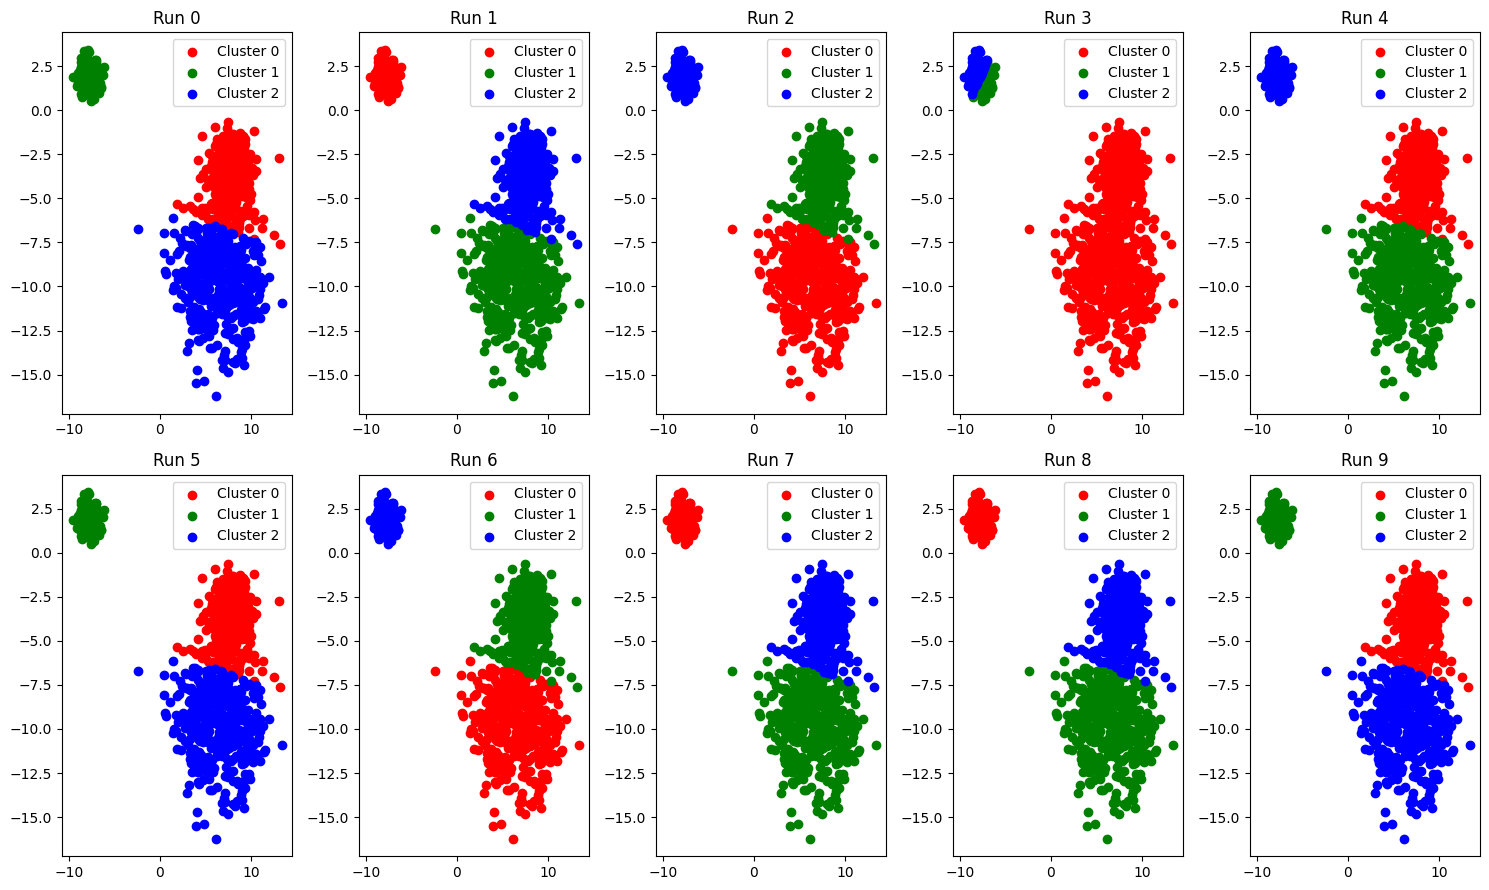

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def visualize_kmeans(data, n_init=10):
    kmeans_models = []
    
    for i in range(n_init):
        kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=i)
        kmeans.fit(data)
        kmeans_models.append(kmeans)
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 9))
    axes = axes.flatten()
    
    colors = ['red', 'green', 'blue']
    
    for i, ax in enumerate(axes):
        labels = kmeans_models[i].labels_
        
        for j, color in enumerate(colors):
            ax.scatter(data[0][labels == j], data[1][labels == j], c=color, label=f'Cluster {j}')
        
        ax.set_title(f'Run {i}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

visualize_kmeans(data=data)


### Random Restarts and K-Means++
In the results above you should observe a couple of things:
* Clustering is not consistent across runs
* The small cluster is split into several clusters in some runs
* The cluster labels (equal to colors) are not consistent across otherwise identical clusterings
    
In the cell below you will allow random restarts and use K-Means++ initialization.  Perform the following:
* Fit a KMeans() model with Kmeans++ initialization (init='k-means++') and 50 random restarts (n_init=50)
* Show the results in a scatterplot with data colored by cluster assignment

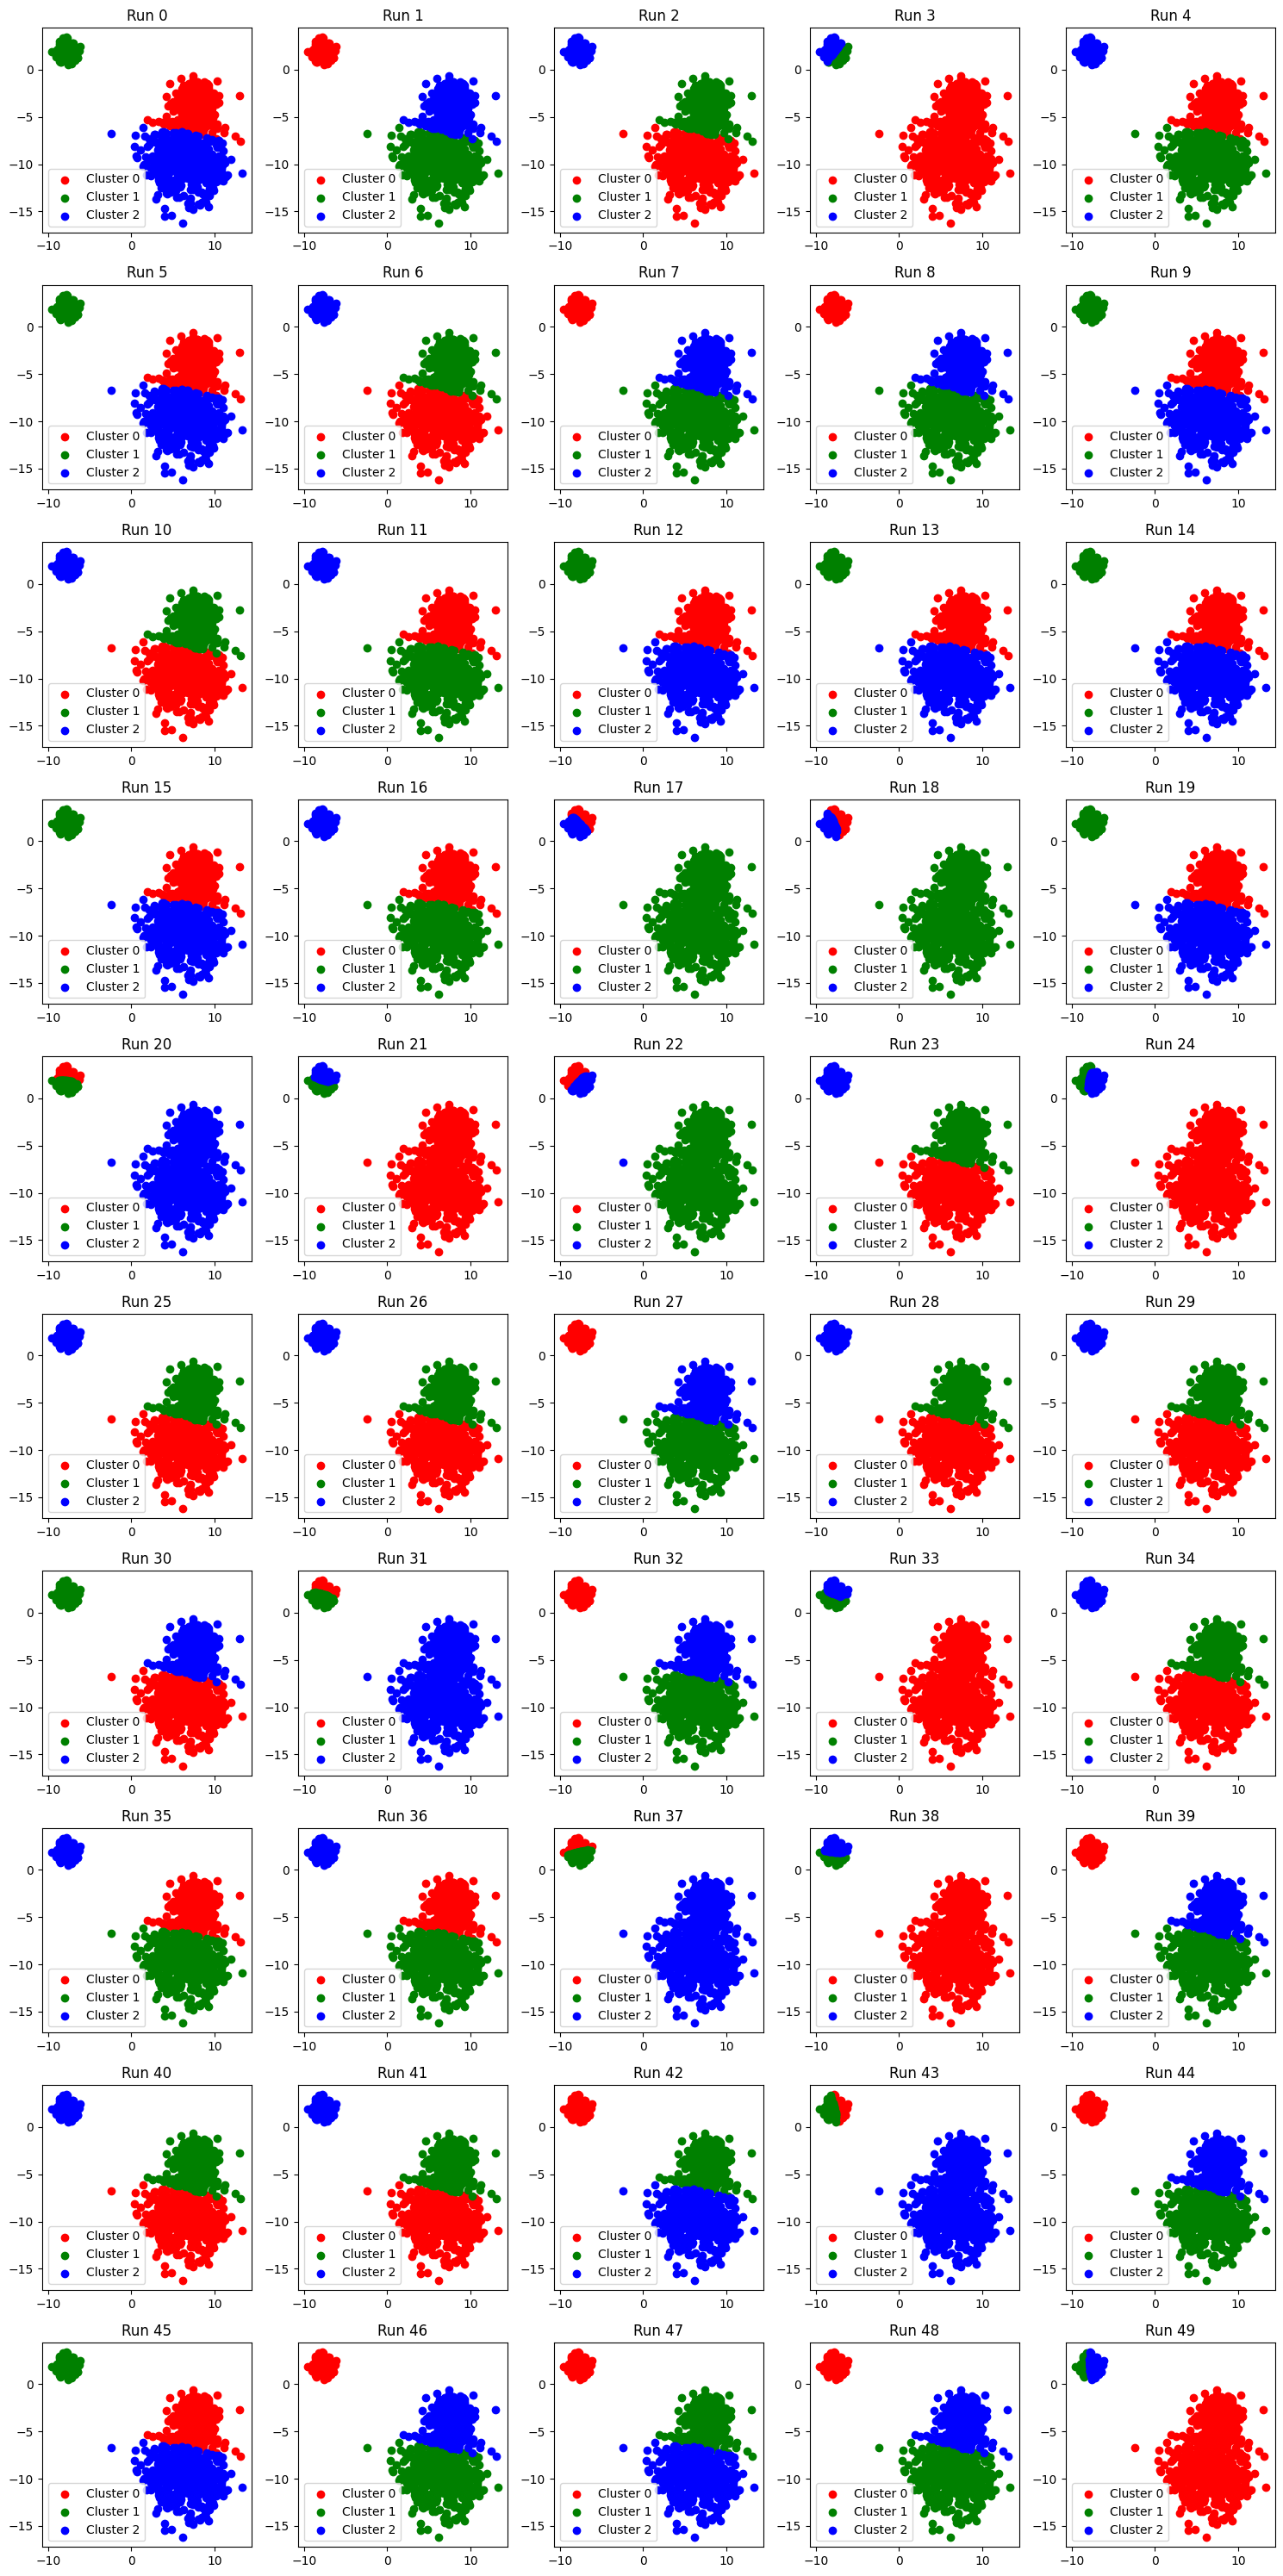

In [47]:
# Insert code here
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def visualize_kmeans(data, n_init=50):
    kmeans_models = []
    
    for i in range(n_init):
        kmeans = KMeans(n_clusters=3, init='random', n_init=1, random_state=i)
        kmeans.fit(data)
        kmeans_models.append(kmeans)
    
    fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 30))
    axes = axes.flatten()
    
    colors = ['red', 'green', 'blue']
    
    for i, ax in enumerate(axes):
        labels = kmeans_models[i].labels_
        
        for j, color in enumerate(colors):
            ax.scatter(data[0][labels == j], data[1][labels == j], c=color, label=f'Cluster {j}')
        
        ax.set_title(f'Run {i}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

visualize_kmeans(data=data)


### Cluster Summary Statistics
Cluster analysis begins with finding clusters, then analyzes properties of each cluster distribution.  Let's look at some summary statistics of each cluster, and compare them.  In the cell below, create a boxplot showing the distribution of the first feature for each cluster.  Specification of the plot is the following:
* There should be 3 boxes on the X-axis, one for each cluster
* Each box shows median / quartiles of the 1st feature (i.e. 1st dimension of the data)
* Label X-ticks by the cluster ID (0, 1, or 2)

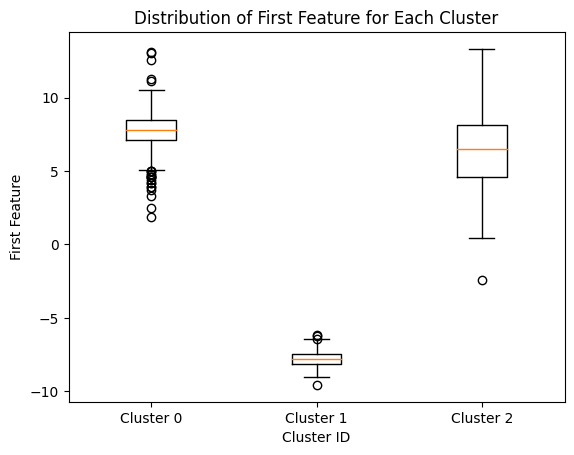

In [55]:
# Cluster data based on K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data)

# Create cluster-specific data
cluster_data = [data.loc[labels == i, data.columns[0]] for i in range(3)]

# Create the boxplot
plt.boxplot(cluster_data)
plt.xticks([1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster ID')
plt.ylabel('First Feature')
plt.title('Distribution of First Feature for Each Cluster')
plt.show()

# Problem 2 : Gaussian Mixture Model 
The K-Means model is not ideal for a couple of reasons.  First, it measures clusters by the Euclidean distance from each point to it centroid.  This is equivalen to assuming all clusters are spherically distributed.  Second, it assigns each data point to exactly one cluster.  By contrast, the Gaussian mixture model (GMM) is a probability model over clusters.  In the GMM data are not assigned to a single cluster, and cluster covariances are not required to be spherical.  The sub-problems below will explore the GMM on our synthetic data.

In [58]:
def plot_gmm_contours(gmm, ax, xlim, ylim):
    '''
    INPUT:
      gmm - GaussianMixture object that has been fitted to data
      ax - Matplotlib Axes object
      xlim, ylim - Array type with lower / upper bounds, e.g. xlim=(-10, 10)    
    '''
    xvals = np.linspace(xlim[0], xlim[1])
    yvals = np.linspace(ylim[0], ylim[1])
    xmesh, ymesh = np.meshgrid(xvals, yvals)
    XX = np.array([xmesh.ravel(), ymesh.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(xmesh.shape)
    ax.contour(xmesh, ymesh, Z)

In [69]:
data

,0,1
0,7.918227,-3.381393
1,-7.911513,1.642909
2,8.891254,-11.327502
3,7.477215,-3.769888
4,-8.076607,2.046299
...,...,...
1495,10.004609,-9.559972
1496,7.387549,-3.541968
1497,9.608011,-2.691480
1498,-8.502874,1.830030


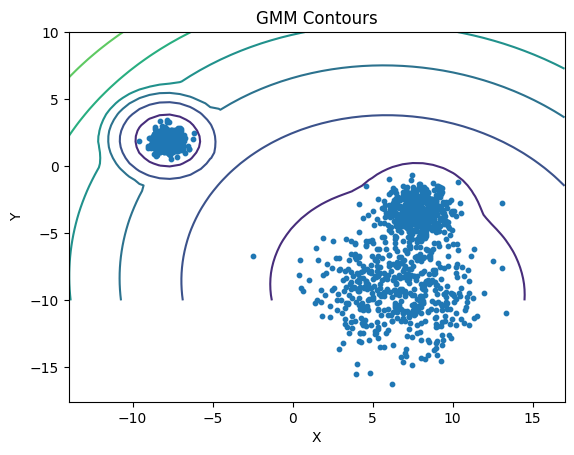

In [71]:
from sklearn.mixture import GaussianMixture

# Create and fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(data)  # Replace X with your data

# Create the plot
fig, ax = plt.subplots()
ax.scatter(data[0], data[1], s=10)  # Replace X[:, 0] and X[:, 1] with appropriate column indices
plot_gmm_contours(gmm, ax, xlim=(-14, 17), ylim=(-10, 10))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM Contours')
plt.show()


### Initialization
In some ways, GMM can be even more sensitive to initialization than K-Means primarily because it has a lot more "stuff" to learn.  In addition to learning the covariances of each cluster it also has to learn a probability distribution over assignments, rather than a hard assignment.  In practice this can create real problems for fitting the GMM model.  Let's explore initialization a bit in the cell below:
* Similar to what you did for K-Means, fit 10 different GMM models, each with a random initializatoin
* For each model use random initializations (init_params='random') and disable random restarts (n_init=1)
* Visualize the results of each run in a scatterplot, with data color-coded by assignment (just as in K-Means)

Note: GMM does not produce a hard assignment to the data, but rather a distribution.  To access a predicted assignment (for coloring scatterplots) you should call the predict() function, which will return a vector of assignment labels.

[Documentation - Scikit-Learn - mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.predict)

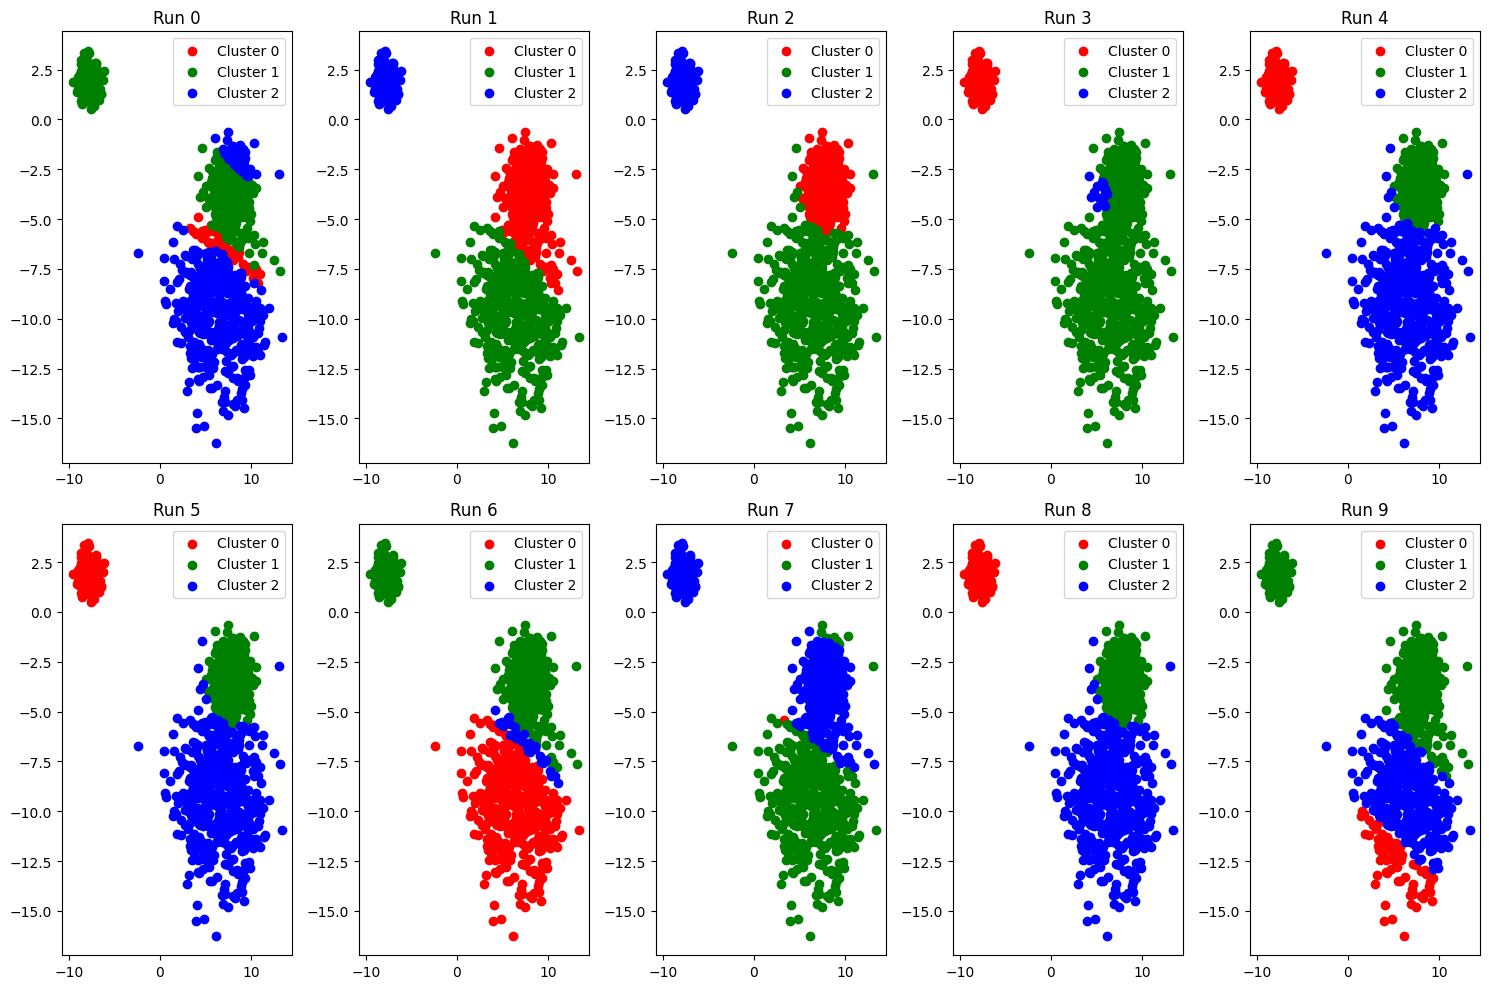

In [67]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def visualize_gmm(data, n_init=10):
    gmm_models = []
    
    for i in range(n_init):
        gmm = GaussianMixture(n_components=3, init_params='random', n_init=1, random_state=i)
        gmm.fit(data)  # Replace 'data' with your actual dataset
        gmm_models.append(gmm)
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['red', 'green', 'blue']
    
    for i, ax in enumerate(axes):
        labels = gmm_models[i].predict(data)  # Use 'predict' to assign labels
        
        for j, color in enumerate(colors):
            ax.scatter(data[0][labels == j], data[1][labels == j], c=color, label=f'Cluster {j}')
        
        ax.set_title(f'Run {i}')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Replace 'data' with your actual dataset
visualize_gmm(data)


### Cluster Covariances 
GMM is capable of fitting a full covariance matrix to each cluster, which captures correlation within the cluster. However, for $D$-dimensional a full covariance matrix is $D\times D$ and has roughly $D^2$ parameters.  This is not a problem in our two-dimensional scenario, but it can be an issue in cases where data are high-dimensional and/or there is limited training data.  To get around this, the GaussianMixture object allows you to specify the parameter 'covariance_type' to determine the type of covariance.  The values and their meaning are as follows:
* covariance_type='tied' : restricts all clusters to have the exact same covariance.  
* covariance_type='spherical' : Is the fewest parameters and only learns spherical variances (does not model correlation), similar to K-Means
* covariance_type='full' : Learns a complete covariance matrix for each cluster (the most learnable parameters) 

To directly visualize covariance we have provided you with a helper function plot_gmm_contours.  The function takes in a fitted GMM object, Matplotlib Axes, and limits for the X- and Y- axes of the plot.  For this problem I find xlim=(-11,15) and ylim(-18,5) to work well.  In the cell below do the following:
* Fit 3 separate Gaussian Mixture Models with each of the covariance types above (use n_components=3 and default parameters for initialization)
* Produce 3 separate plots showing, both, the contours of the GMM probability density and a scatterplot of the data color-coded by the assignment

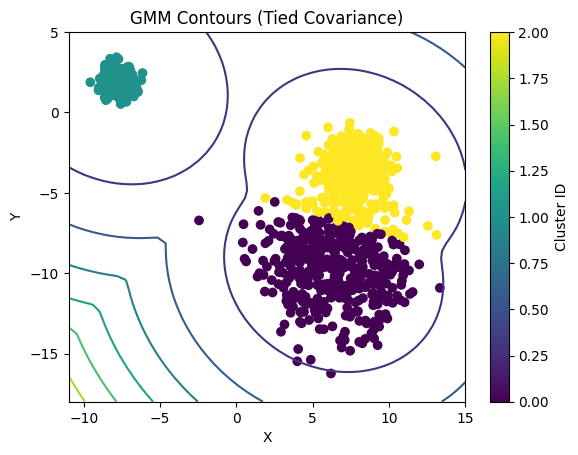

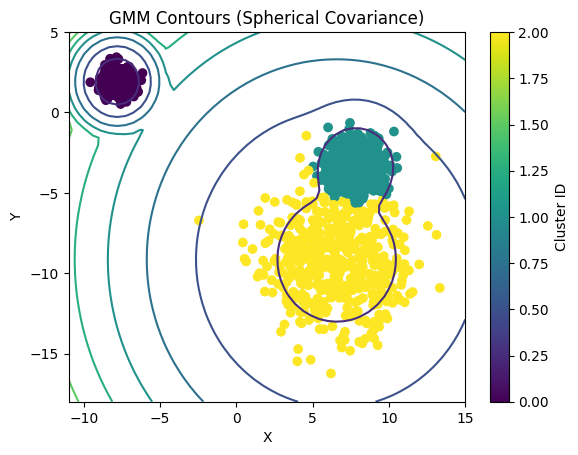

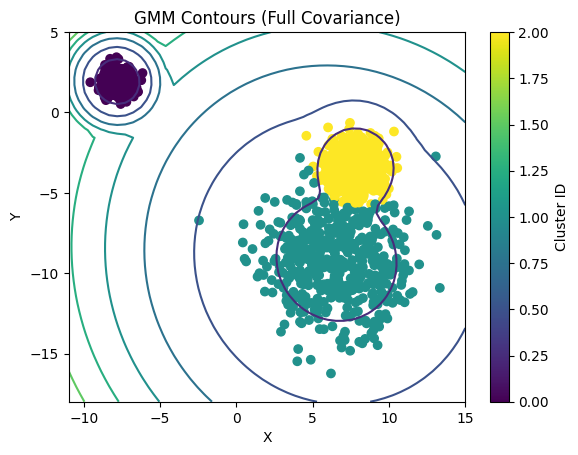

In [76]:
# Insert code here
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Fit GMM with 'tied' covariance
gmm_tied = GaussianMixture(n_components=3, covariance_type='tied')
gmm_tied.fit(data)  # Replace 'data' with your actual dataset

# Fit GMM with 'spherical' covariance
gmm_spherical = GaussianMixture(n_components=3, covariance_type='spherical')
gmm_spherical.fit(data)  # Replace 'data' with your actual dataset

# Fit GMM with 'full' covariance
gmm_full = GaussianMixture(n_components=3, covariance_type='full')
gmm_full.fit(data)  # Replace 'data' with your actual dataset

# Plot GMM contours and scatter plot for 'tied' covariance
fig, ax = plt.subplots()
plot_gmm_contours(gmm_tied, ax, xlim=(-11, 15), ylim=(-18, 5))
scatter = ax.scatter(data[0], data[1], c=gmm_tied.predict(data), cmap='viridis')
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM Contours (Tied Covariance)')
plt.show()

# Plot GMM contours and scatter plot for 'spherical' covariance
fig, ax = plt.subplots()
plot_gmm_contours(gmm_spherical, ax, xlim=(-11, 15), ylim=(-18, 5))
scatter = ax.scatter(data[0], data[1], c=gmm_spherical.predict(data), cmap='viridis')
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM Contours (Spherical Covariance)')
plt.show()

# Plot GMM contours and scatter plot for 'full' covariance
fig, ax = plt.subplots()
plot_gmm_contours(gmm_full, ax, xlim=(-11, 15), ylim=(-18, 5))
scatter = ax.scatter(data[0], data[1], c=gmm_full.predict(data), cmap='viridis')
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GMM Contours (Full Covariance)')
plt.show()

### GMM Cluster Analysis
Since GMM learns a "soft" assignment, known as a "responsibility", we can investigate the probability of data points being assigned to particular clusters.  Let's probe the model for assignment of a data point $(7,-6)$, which lies partway between two clusters.  Do the following in the cell below:
* Fit a GaussianMixture model with covariance_type='full' and n_components=3
* Using predict_proba() compute the probability of assignment for point $(7,-6)$
* Produce a bar chart showing the probability distribution
* Label axes and title the plot appropriately

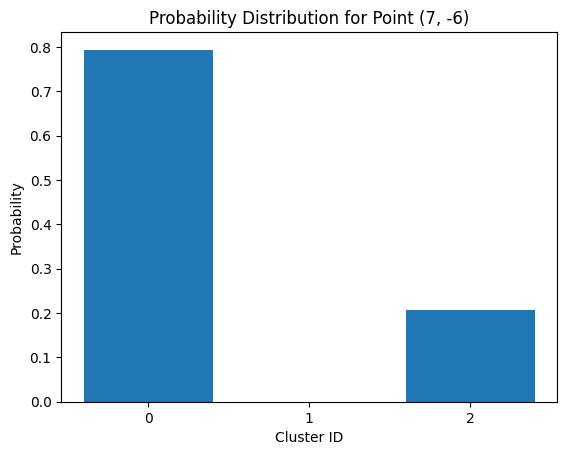

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data)  # Replace 'data' with your actual dataset

# Compute the probability of assignment for point (7, -6)
point = np.array([[7, -6]])
proba = gmm.predict_proba(point)

# Create the bar chart for probability distribution
plt.bar(range(gmm.n_components), proba.flatten())
plt.xticks(range(gmm.n_components))
plt.xlabel('Cluster ID')
plt.ylabel('Probability')
plt.title('Probability Distribution for Point (7, -6)')
plt.show()

# <font color = green|><b><p style='text-align:center'>The End !!!